In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from tqdm import tqdm

import requests  # requests 모듈 임포트

In [2]:
ov = pd.read_excel('../data./overview/Overview2022.xlsx')


In [4]:
ov.head()

,Unnamed: 0,T3.9M.9bf-pt01_sel,T3.9M.9pulv-tcfc,T3.9M.9fof-wof,T3.9M.9ah-aaogt,T3.9M.9ah-abogt,T3.9M.9fg-at04a_sel,T3.9M.9fg-at04b_sel,T3.9M.9stm_msp,T3.9M.9stm_mst,...,T3.9M.9sc-tt34a,T3.9M.9sc-tt34b,T3.9M.9fg-at15b,T3.9M.9gf-at31,T3.9M.9gf-at32,T3.9M.9gf-at33,T3.9M.9gf-at34,T3.9M.9gf-at35,T3.9M.9gf-ft36,T3.9M.9gf-tt37
0,2022-01-01 00:00:00,-3.427369,291.313385,0.0,118.311928,115.937225,3.633081,3.330590,190.242386,601.214233,...,337.056244,338.824707,0.076524,6.775553,16.570759,5.758502,1.014872,76.241112,190740.421875,70.318398
1,2022-01-01 00:01:00,-3.753788,291.849976,0.0,118.295441,116.043159,3.875365,3.269325,190.010178,601.335571,...,336.969147,338.893402,0.076382,7.009288,15.644674,6.006443,1.033949,49.934677,333235.875000,70.388252
2,2022-01-01 00:02:00,-2.659781,292.477966,0.0,118.331841,116.133240,3.838585,3.309375,190.347473,601.373962,...,336.946472,338.918488,0.072193,6.651844,17.693907,6.075021,1.017401,53.964096,221850.281250,70.453339
3,2022-01-01 00:03:00,-2.629215,292.732574,0.0,118.427757,116.216637,3.845149,3.410978,189.908829,601.188538,...,336.885437,338.935822,0.079024,6.906446,16.937054,5.780530,1.001931,74.838707,195507.546875,70.264877
4,2022-01-01 00:04:00,-2.604067,292.370819,0.0,118.482689,116.321358,3.524589,3.217976,190.402618,601.119873,...,336.932098,338.937103,0.078638,6.734928,17.445210,5.853805,0.995349,48.305248,186033.953125,70.411987


In [5]:
ov.isnull().sum() #각 컬럼에 null 값 갯수 세기

Unnamed: 0                 0
T3.9M.9bf-pt01_sel         0
T3.9M.9pulv-tcfc           0
T3.9M.9fof-wof             0
T3.9M.9ah-aaogt            0
T3.9M.9ah-abogt            0
T3.9M.9fg-at04a_sel        0
T3.9M.9fg-at04b_sel        0
T3.9M.9stm_msp             0
T3.9M.9stm_mst             0
T3.9M.9rh-pt12a_sel        0
T3.9M.9stm-rot             0
T3.9M.9stm-rit             0
T3.9M.9rh-pt11a_sel        0
T3.9M.9rh-pt11a_sel.1      0
T3.9M.9dw-pt01_sel         0
T3.9M.9dw-tt01_sel         0
T3.9M.9he-lt01_sel         0
T3.9M.9fw-tt51_sel         0
T3.9M.9fw-pt51_sel         0
T3.9M.9fw-ft51_comp_ewf    0
T3.9M.9cd-ft14_sel         0
T3.9M.9bf-pt01             0
T3.9M.9bf-pt02             0
T3.9M.9bf-pt03             0
T3.9M.9fg-at11a_sel        0
T3.9M.9fg-at11b_sel        0
T3.9M.9fg-at04b_sel.1      0
T3.9M.9pa-pt14a            0
T3.9M.9pa-tt14a            0
T3.9M.9sa-pt21a            0
T3.9M.9ah-aaiat            0
T3.9M.9ah-abiat            0
T3.9M.9sa-pt21b            0
T3.9M.9pa-pt14

In [6]:
ov = ov.drop(ov.iloc[:,[7, 14, 38, 39]], axis=1) # SCR 겹치는 컬럼 삭제

In [7]:
ov.loc[0] = [
    'Description',
    'FURN GAS PRESS',
    'TOTAL COAL FLOW WITHOUT CALORI',
    'W/U OIL SUPL FLOW',
    'AH A OUT GAS TEMP',
    'AH B OUT GAS TEMP',
    'ECON A OUT GAS O2 ANAL.(Analysis)',
    'MAIN STEAM PRESS',
    'MAIN STM TEMP',
    'RH(Reheater) OUT STM PRESS(To IP Turbine)',
    'SRH(Reheater) OUT STM TEMP',
    'PRH(Preheater) IN STM TEMP',
    'CRH A STM PRESS SELECTION',
    'FWT(Feed Water Tank) PRESS',
    'FWT TEMP',
    'FWT LVL',
    'ECON INLET FW TEMP',
    'ECON INLET FW PRESS',
    'ECON INLET FW FLOW',
    'Condenser to Deaerator Flow',
    'FURN GAS PRESS 1',
    'FURN GAS PRESS 2',
    'FURN GAS PRESS 3',
    'ECON A OUT GAS CO ANAL',
    'ECON B OUT GAS CO ANAL',
    'ECON B OUT GAS O2 ANAL',
    'AH A IN PRIM AIR PRESS',
    'AH A IN PRIM AIR TEMP',
    'AH A IN SEC AIR PRESS',
    'AH A IN SEC AIR TEMP',
    'AH B IN SEC AIR TEMP',
    'AH B IN SEC AIR PRESS',
    'AH B IN PRIM AIR PRESS',
    'AH B IN PRIM AIR TEMP',
    'AH A IN GAS CO2 ANAL',
    'AH B IN GAS CO2 ANAL',
    'ECON B OUT GAS SO2 ANAL',
    'STACK SO2',
    'STACK NOX',
    'STACK O2',
    'STACK DUST',
    'STACT CO',
    'STACK GAS FLOW',
    'STACK GAS TEMP.'
]

C:\Users\CSK\AppData\Local\Temp\ipykernel_8416\954598949.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Description' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  ov.loc[0] = [
C:\Users\CSK\AppData\Local\Temp\ipykernel_8416\954598949.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'FURN GAS PRESS' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ov.loc[0] = [
C:\Users\CSK\AppData\Local\Temp\ipykernel_8416\954598949.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'TOTAL COAL FLOW WITHOUT CALORI' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ov.loc[0] = [
C:\Users\CSK\AppData\Local\Temp\ipykernel

In [8]:
scr = pd.read_excel('../data./scr/SCR_2022.xlsx')

In [9]:
scr.loc[0] = [
    'Description',
    'SCR A Inlet Duct Temp Sel',
    'SCR A I/L Duct Nox/O2 Anal Sel',
    'SCR A Inlet O2 1 Sel',
    'SCR A Inlet Duct Press',
    'SCR A 1st Diff Press',
    'SCR A 2nd Diff Press',
    '9SC-DIT33A',
    '9SC-DIT34A',
    'SCR A Outlet Duct Temp',
    'Air Receiver Tank Outlet Press',
    'SCR A O/L Duct NH3 Analyz Sel',
    'SCR A Outlet Nox Set Point',
    'SCR A Outlet NH3 1 Sel',
    'SCR A Outlet Duct Press',
    'SCR A Outlet O2 1 Sel',
    'SCR B Inlet Duct Temp 1 Med',
    'SCR B I/L Duct Nox/O2 Anal Sel',
    'SCR B Inlet O2 1 Sel',
    'SCR B Inlet Duct Press',
    'SCR B 1st Diff Press',
    'SCR B 2nd Diff Press',
    '9SC-DIT33B',
    '9SC-DIT34B',
    'SCR B Outlet Duct Temp',
    'SCR B O/L Duct NH3 Analyz Sel',
    'SCR B Outlet Nox Set Point',
    'SCR B Outlet NH3 1 Sel',
    'SCR B Outlet Duct Press',
    'SCR B Outlet O2 1 Sel',
    'Service Water HT Press',
    'Ammonia Unload Supply Flow',
    'Ammonia Storage Tank A Press',
    'Ammonia Storage Tank A Temp',
    'Ammonia Storage Tank A Weight Scale',
    'Ammonia Storage Tank A Level 1',
    'Ammonia Storage Tank A Level 2',
    'Ammonia Stoarage Tank A To Vaporizer Flow',
    'Ammonia Storage Tank B Press',
    'Ammonia Storage Tank B Temp',
    'Ammonia Storage Tank B Weight Scale',
    'Ammonia Storage Tank B Level 1',
    'Ammonia Storage Tank B Level 2',
    'Ammonia Stoarage Tank B To Vaporizer Flow',
    'Ammonia Storage Tank C Press',
    'Ammonia Storage Tank C Temp',
    'Ammonia Storage Tank C Weight Scale',
    'Ammonia Storage Tank C Level 1',
    'Ammonia Storage Tank C Level 2',
    'Ammonia Stoarage Tank C To Vaporizer Flow',
    'Vaporizer A Temp Sel',
    'Vaporizer A Press',
    'Vaporizer A Level',
    'Vaporizer A STM TCV POS',
    'Accumulator A Inlet PCV POS',
    'Accumulator A Press Sel',
    'Accumulator A Temp',
    'Vaporizer B Temp Sel',
    'Vaporizer B Press',
    'Vaporizer B Level',
    'Vaporizer B STM TCV POS',
    'Accumulator B Inlet PCV POS',
    'Accumulator B Press Sel',
    'Accumulator B Temp',
    'Vaporizer C Temp Sel',
    'Vaporizer C Press',
    'Vaporizer C Level',
    'Vaporizer C STM TCV POS',
    'Accumulator C Inlet PCV POS',
    'Accumulator C Press Sel',
    'Accumulator C Temp',
    'AMM/AIR Mixer-A Inlet Flow Sel',
    'AMM/AIR Mixer-B Inlet Flow Sel',
    'Dilution Air Blower A Outlet Flow',
    'Dilution Air Blower B Outlet Flow'
]


C:\Users\CSK\AppData\Local\Temp\ipykernel_8416\2546752838.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Description' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  scr.loc[0] = [
C:\Users\CSK\AppData\Local\Temp\ipykernel_8416\2546752838.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'SCR A Inlet Duct Temp Sel' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  scr.loc[0] = [
C:\Users\CSK\AppData\Local\Temp\ipykernel_8416\2546752838.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'SCR A I/L Duct Nox/O2 Anal Sel' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  scr.loc[0] = [
C:\Users\CSK\AppData\Loc

In [10]:
scr.head()

,Unnamed: 0,T3.9M.9sc-tt31a_sel,T3.9M.9sc-at31a_sel,T3.9M.9sc-at37a_sel,T3.9M.9sc-pt31a,T3.9M.9sc-dit31a,T3.9M.9sc-dit32a,T3.9M.9sc-dit33a,T3.9M.9sc-dit34a,T3.9M.9sc-tt34a,...,T3.CM.9ai-pt11c,T3.CM.9ai-lt11c,T3.CM.9ai-tcv11c-zt,T3.CM.9ai-pcv11c-zt,T3.CM.9ai-pit12c_sel,T3.CM.9ai-tt13c,T3.9M.9ai-ft21a_sel,T3.9M.9ai-ft21b_sel,T3.9M.9ai-ft24a_flow,T3.9M.9ai-ft24b_flow
0,Description,SCR A Inlet Duct Temp Sel,SCR A I/L Duct Nox/O2 Anal Sel,SCR A Inlet O2 1 Sel,SCR A Inlet Duct Press,SCR A 1st Diff Press,SCR A 2nd Diff Press,9SC-DIT33A,9SC-DIT34A,SCR A Outlet Duct Temp,...,Vaporizer C Press,Vaporizer C Level,Vaporizer C STM TCV POS,Accumulator C Inlet PCV POS,Accumulator C Press Sel,Accumulator C Temp,AMM/AIR Mixer-A Inlet Flow Sel,AMM/AIR Mixer-B Inlet Flow Sel,Dilution Air Blower A Outlet Flow,Dilution Air Blower B Outlet Flow
1,2022-01-01 00:01:00,343.611176,107.234856,2.676904,-7.993506,1.415854,1.455722,0.880508,0.497513,336.969147,...,4.865041,1613.910889,22.753754,41.938046,1.185855,41.946018,94.868774,96.616653,7920.539062,8346.331055
2,2022-01-01 00:02:00,343.792419,108.140343,2.649779,-6.964178,1.240682,1.462029,0.848083,0.539093,336.946472,...,3.887043,1613.797241,21.855509,41.787102,1.178153,41.929485,94.667389,94.829712,7871.101562,8319.961914
3,2022-01-01 00:03:00,343.698639,110.913483,2.727307,-6.927091,1.995119,1.404034,0.886993,0.521927,336.885437,...,4.746593,1613.758911,21.694527,41.307083,1.216317,41.923538,94.292648,92.795746,7865.766602,8317.635742
4,2022-01-01 00:04:00,343.445801,114.168465,2.456151,-6.994386,1.816568,1.338754,0.957184,0.504761,336.932098,...,4.988699,1613.673706,20.695755,42.568756,1.191263,41.921238,99.489204,95.827354,7890.499512,8307.662109


In [11]:
print(scr.isnull().sum())

Unnamed: 0                 0
T3.9M.9sc-tt31a_sel        0
T3.9M.9sc-at31a_sel        0
T3.9M.9sc-at37a_sel        0
T3.9M.9sc-pt31a            0
                        ... 
T3.CM.9ai-tt13c            0
T3.9M.9ai-ft21a_sel        0
T3.9M.9ai-ft21b_sel        0
T3.9M.9ai-ft24a_flow    7200
T3.9M.9ai-ft24b_flow       0
Length: 75, dtype: int64


In [12]:
scr = scr.drop(scr.iloc[:,[0, 52, 59]],axis=1)

In [13]:
df = pd.concat([ov,scr],axis=1)

In [14]:
df = df.dropna()

In [15]:
df

,Unnamed: 0,T3.9M.9bf-pt01_sel,T3.9M.9pulv-tcfc,T3.9M.9fof-wof,T3.9M.9ah-aaogt,T3.9M.9ah-abogt,T3.9M.9fg-at04a_sel,T3.9M.9stm_msp,T3.9M.9stm_mst,T3.9M.9rh-pt12a_sel,...,T3.CM.9ai-pt11c,T3.CM.9ai-lt11c,T3.CM.9ai-tcv11c-zt,T3.CM.9ai-pcv11c-zt,T3.CM.9ai-pit12c_sel,T3.CM.9ai-tt13c,T3.9M.9ai-ft21a_sel,T3.9M.9ai-ft21b_sel,T3.9M.9ai-ft24a_flow,T3.9M.9ai-ft24b_flow
0,Description,FURN GAS PRESS,TOTAL COAL FLOW WITHOUT CALORI,W/U OIL SUPL FLOW,AH A OUT GAS TEMP,AH B OUT GAS TEMP,ECON A OUT GAS O2 ANAL.(Analysis),MAIN STEAM PRESS,MAIN STM TEMP,RH(Reheater) OUT STM PRESS(To IP Turbine),...,Vaporizer C Press,Vaporizer C Level,Vaporizer C STM TCV POS,Accumulator C Inlet PCV POS,Accumulator C Press Sel,Accumulator C Temp,AMM/AIR Mixer-A Inlet Flow Sel,AMM/AIR Mixer-B Inlet Flow Sel,Dilution Air Blower A Outlet Flow,Dilution Air Blower B Outlet Flow
1,2022-01-01 00:01:00,-3.753788,291.849976,0.0,118.295441,116.043159,3.875365,190.010178,601.335571,30.266945,...,4.865041,1613.910889,22.753754,41.938046,1.185855,41.946018,94.868774,96.616653,7920.539062,8346.331055
2,2022-01-01 00:02:00,-2.659781,292.477966,0.0,118.331841,116.13324,3.838585,190.347473,601.373962,30.159149,...,3.887043,1613.797241,21.855509,41.787102,1.178153,41.929485,94.667389,94.829712,7871.101562,8319.961914
3,2022-01-01 00:03:00,-2.629215,292.732574,0.0,118.427757,116.216637,3.845149,189.908829,601.188538,30.168106,...,4.746593,1613.758911,21.694527,41.307083,1.216317,41.923538,94.292648,92.795746,7865.766602,8317.635742
4,2022-01-01 00:04:00,-2.604067,292.370819,0.0,118.482689,116.321358,3.524589,190.402618,601.119873,30.156834,...,4.988699,1613.673706,20.695755,42.568756,1.191263,41.921238,99.489204,95.827354,7890.499512,8307.662109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,2022-03-31 23:55:00,-0.204471,0.0,0.0,9.227257,9.539831,9.5,0.370789,34.501793,0.334526,...,6.21478,1603.074829,17.981804,35.853966,1.213971,43.506485,0.034583,0.003083,0.0,0.050583
129596,2022-03-31 23:56:00,-0.204471,0.0,0.0,9.20892,9.51141,9.5,0.370789,34.496841,0.337069,...,6.53998,1602.821045,18.776785,36.639885,1.198556,43.480282,0.034582,0.003083,0.0,0.044635
129597,2022-03-31 23:57:00,-0.204471,0.0,0.0,9.204,9.531528,9.5,0.370789,34.439465,0.335491,...,5.84696,1602.430786,18.776186,37.20726,1.187272,43.481964,0.034582,0.003083,0.0,0.101097
129598,2022-03-31 23:58:00,-0.204471,0.0,0.0,9.199413,9.545298,9.5,0.370789,34.456226,0.333403,...,6.910905,1602.05481,18.770578,36.565933,1.218023,43.485794,0.034579,0.003083,0.0,0.04781


In [ ]:
# df.to_csv("../data/preprocessing.csv", index = False)

In [35]:
df1 = df

In [36]:
df1.columns = [df.iloc[0,:]] #컬럼명 지정

In [37]:
df1 = df1.drop(0, axis=0)

In [20]:
df2 = df1.iloc[:,1:]

In [21]:
df2.corr()

,FURN GAS PRESS,TOTAL COAL FLOW WITHOUT CALORI,W/U OIL SUPL FLOW,AH A OUT GAS TEMP,AH B OUT GAS TEMP,ECON A OUT GAS O2 ANAL.(Analysis),MAIN STEAM PRESS,MAIN STM TEMP,RH(Reheater) OUT STM PRESS(To IP Turbine),SRH(Reheater) OUT STM TEMP,...,Vaporizer C Press,Vaporizer C Level,Vaporizer C STM TCV POS,Accumulator C Inlet PCV POS,Accumulator C Press Sel,Accumulator C Temp,AMM/AIR Mixer-A Inlet Flow Sel,AMM/AIR Mixer-B Inlet Flow Sel,Dilution Air Blower A Outlet Flow,Dilution Air Blower B Outlet Flow
0,,,,,,,,,,,,,,,,,,,,,
FURN GAS PRESS,1.000000,-0.759873,-0.220662,-0.781455,-0.796051,0.750625,-0.792603,-0.676283,-0.784260,-0.704808,...,0.396919,0.151849,-0.247617,-0.334146,0.000402,-0.129840,-0.710473,-0.696811,-0.904239,-0.903895
TOTAL COAL FLOW WITHOUT CALORI,-0.759873,1.000000,-0.170682,0.946447,0.956418,-0.966726,0.992862,0.846522,0.995928,0.868878,...,-0.549251,-0.242557,0.302699,0.448586,-0.004167,0.119318,0.947122,0.942474,0.898583,0.898554
W/U OIL SUPL FLOW,-0.220662,-0.170682,1.000000,-0.036338,-0.004982,0.173369,-0.093438,0.011762,-0.117470,0.001040,...,0.003071,0.109841,-0.045303,-0.053177,0.000939,-0.026373,-0.157343,-0.160700,0.082591,0.083086
AH A OUT GAS TEMP,-0.781455,0.946447,-0.036338,1.000000,0.989183,-0.927853,0.963889,0.922080,0.952983,0.937983,...,-0.592525,-0.223965,0.256311,0.404944,-0.000246,0.064770,0.887386,0.871583,0.933996,0.934265
AH B OUT GAS TEMP,-0.796051,0.956418,-0.004982,0.989183,1.000000,-0.931147,0.975391,0.916227,0.965074,0.931032,...,-0.584591,-0.219133,0.273757,0.420094,0.000492,0.082242,0.898290,0.887609,0.941010,0.941166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Accumulator C Temp,-0.129840,0.119318,-0.026373,0.064770,0.082242,-0.110205,0.121142,0.063808,0.125192,0.069432,...,-0.316322,-0.037479,0.728474,0.787001,0.002425,1.000000,0.213554,0.228224,0.123382,0.123944
AMM/AIR Mixer-A Inlet Flow Sel,-0.710473,0.947122,-0.157343,0.887386,0.898290,-0.904373,0.939640,0.792591,0.942505,0.813560,...,-0.546978,-0.230160,0.399337,0.549968,0.001787,0.213554,1.000000,0.984116,0.840283,0.840312
AMM/AIR Mixer-B Inlet Flow Sel,-0.696811,0.942474,-0.160700,0.871583,0.887609,-0.894902,0.934986,0.779443,0.938978,0.800288,...,-0.531207,-0.226274,0.410432,0.558420,-0.002878,0.228224,0.984116,1.000000,0.826049,0.825677


In [22]:
cor = df2.corr()

In [23]:
d = cor['STACK NOX'].reset_index()
d.columns=['a','b']

In [24]:
d.sort_values(by='b', ascending=False, inplace=True)

,a,b
37,STACK NOX,1.000000
71,SCR B Outlet O2 1 Sel,0.718651
45,SCR A Inlet O2 1 Sel,0.717626
57,SCR A Outlet O2 1 Sel,0.714590
60,SCR B Inlet O2 1 Sel,0.713925
...,...,...
6,MAIN STEAM PRESS,-0.695946
11,CRH A STM PRESS SELECTION,-0.697319
8,RH(Reheater) OUT STM PRESS(To IP Turbine),-0.697474
25,AH A IN PRIM AIR PRESS,-0.715724


In [56]:
d.loc[(d['b']>=0.5)|(d['b']<=-.5), :]

,a,b
0,FURN GAS PRESS,0.581736
1,TOTAL COAL FLOW WITHOUT CALORI,-0.689107
3,AH A OUT GAS TEMP,-0.651780
4,AH B OUT GAS TEMP,-0.681239
5,ECON A OUT GAS O2 ANAL.(Analysis),0.700736
6,MAIN STEAM PRESS,-0.695946
7,MAIN STM TEMP,-0.503865
8,RH(Reheater) OUT STM PRESS(To IP Turbine),-0.697474
9,SRH(Reheater) OUT STM TEMP,-0.523979
10,PRH(Preheater) IN STM TEMP,-0.573576


In [67]:
df3= df.iloc[:,[0, 38, 46, 58, 25, 62, 1, 57, 8, 56, 10, 96, 28, 11, 98, 51, 44, 114, 16, 113, 67, 48, 112, 14, 4, 60, 2, 13, 7, 9, 26, 12]]

In [68]:
df3

,Description,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,...,AMM/AIR Mixer-A Inlet Flow Sel,FWT TEMP,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION
0,Description,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,...,AMM/AIR Mixer-A Inlet Flow Sel,FWT TEMP,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION
1,2022-01-01 00:01:00,15.644674,2.676904,3.318178,3.269325,-8.789601,-3.753788,-13.25987,601.335571,0.006266,...,94.868774,154.348251,118.295441,101.853127,291.849976,4.897784,190.010178,30.266945,91.131302,31.784813
2,2022-01-01 00:02:00,17.693907,2.649779,3.608741,3.309375,-8.379728,-2.659781,-12.730015,601.373962,0.006393,...,94.667389,154.321426,118.331841,102.231392,292.477966,4.873562,190.347473,30.159149,92.618622,31.677402
3,2022-01-01 00:03:00,16.937054,2.727307,3.584271,3.410978,-8.043564,-2.629215,-12.557507,601.188538,0.006269,...,94.292648,154.354584,118.427757,102.000984,292.732574,4.877539,189.908829,30.168106,94.345795,31.693943
4,2022-01-01 00:04:00,17.44521,2.456151,3.371442,3.217976,-7.827011,-2.604067,-12.547201,601.119873,0.006292,...,99.489204,154.357376,118.482689,103.635376,292.370819,4.872146,190.402618,30.156834,92.338272,31.671024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,2022-03-31 23:55:00,48.161232,19.425358,21.522943,9.5,0.03021,-0.204471,-7.295024,34.501793,0.003393,...,0.034583,14.381057,9.227257,0.0,0.0,0.292851,0.370789,0.334526,-13.345116,0.70839
129596,2022-03-31 23:56:00,48.157345,19.421726,21.522974,9.5,0.03021,-0.204471,-7.324222,34.496841,0.003633,...,0.034582,14.378798,9.20892,0.0,0.0,0.292805,0.370789,0.337069,-13.377852,0.704577
129597,2022-03-31 23:57:00,48.153458,19.424072,21.523499,9.5,0.03021,-0.204471,-7.347273,34.439465,0.003817,...,0.034582,14.37654,9.204,0.0,0.0,0.292759,0.370789,0.335491,-13.406884,0.70457
129598,2022-03-31 23:58:00,48.149574,19.419201,21.523205,9.5,0.03021,-0.204471,-7.355945,34.456226,0.003915,...,0.034579,14.374282,9.199413,0.0,0.0,0.292713,0.370789,0.333403,-13.425872,0.701498


In [69]:
df3 = df3.drop(0, axis=0)

In [70]:
df3.reset_index(inplace=True, drop=True)

In [71]:
df3

,Description,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,...,AMM/AIR Mixer-A Inlet Flow Sel,FWT TEMP,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION
0,2022-01-01 00:01:00,15.644674,2.676904,3.318178,3.269325,-8.789601,-3.753788,-13.25987,601.335571,0.006266,...,94.868774,154.348251,118.295441,101.853127,291.849976,4.897784,190.010178,30.266945,91.131302,31.784813
1,2022-01-01 00:02:00,17.693907,2.649779,3.608741,3.309375,-8.379728,-2.659781,-12.730015,601.373962,0.006393,...,94.667389,154.321426,118.331841,102.231392,292.477966,4.873562,190.347473,30.159149,92.618622,31.677402
2,2022-01-01 00:03:00,16.937054,2.727307,3.584271,3.410978,-8.043564,-2.629215,-12.557507,601.188538,0.006269,...,94.292648,154.354584,118.427757,102.000984,292.732574,4.877539,189.908829,30.168106,94.345795,31.693943
3,2022-01-01 00:04:00,17.44521,2.456151,3.371442,3.217976,-7.827011,-2.604067,-12.547201,601.119873,0.006292,...,99.489204,154.357376,118.482689,103.635376,292.370819,4.872146,190.402618,30.156834,92.338272,31.671024
4,2022-01-01 00:05:00,18.500633,2.346522,3.206993,3.242206,-7.494822,-2.734595,-12.355686,601.747986,0.00633,...,100.710205,154.337967,118.556854,107.21344,291.937164,4.881138,190.46048,30.232658,91.891747,31.758537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100794,2022-03-31 23:55:00,48.161232,19.425358,21.522943,9.5,0.03021,-0.204471,-7.295024,34.501793,0.003393,...,0.034583,14.381057,9.227257,0.0,0.0,0.292851,0.370789,0.334526,-13.345116,0.70839
100795,2022-03-31 23:56:00,48.157345,19.421726,21.522974,9.5,0.03021,-0.204471,-7.324222,34.496841,0.003633,...,0.034582,14.378798,9.20892,0.0,0.0,0.292805,0.370789,0.337069,-13.377852,0.704577
100796,2022-03-31 23:57:00,48.153458,19.424072,21.523499,9.5,0.03021,-0.204471,-7.347273,34.439465,0.003817,...,0.034582,14.37654,9.204,0.0,0.0,0.292759,0.370789,0.335491,-13.406884,0.70457
100797,2022-03-31 23:58:00,48.149574,19.419201,21.523205,9.5,0.03021,-0.204471,-7.355945,34.456226,0.003915,...,0.034579,14.374282,9.199413,0.0,0.0,0.292713,0.370789,0.333403,-13.425872,0.701498


In [72]:
df3.iloc[:, 1:] = df3.iloc[:, 1:].astype('float')

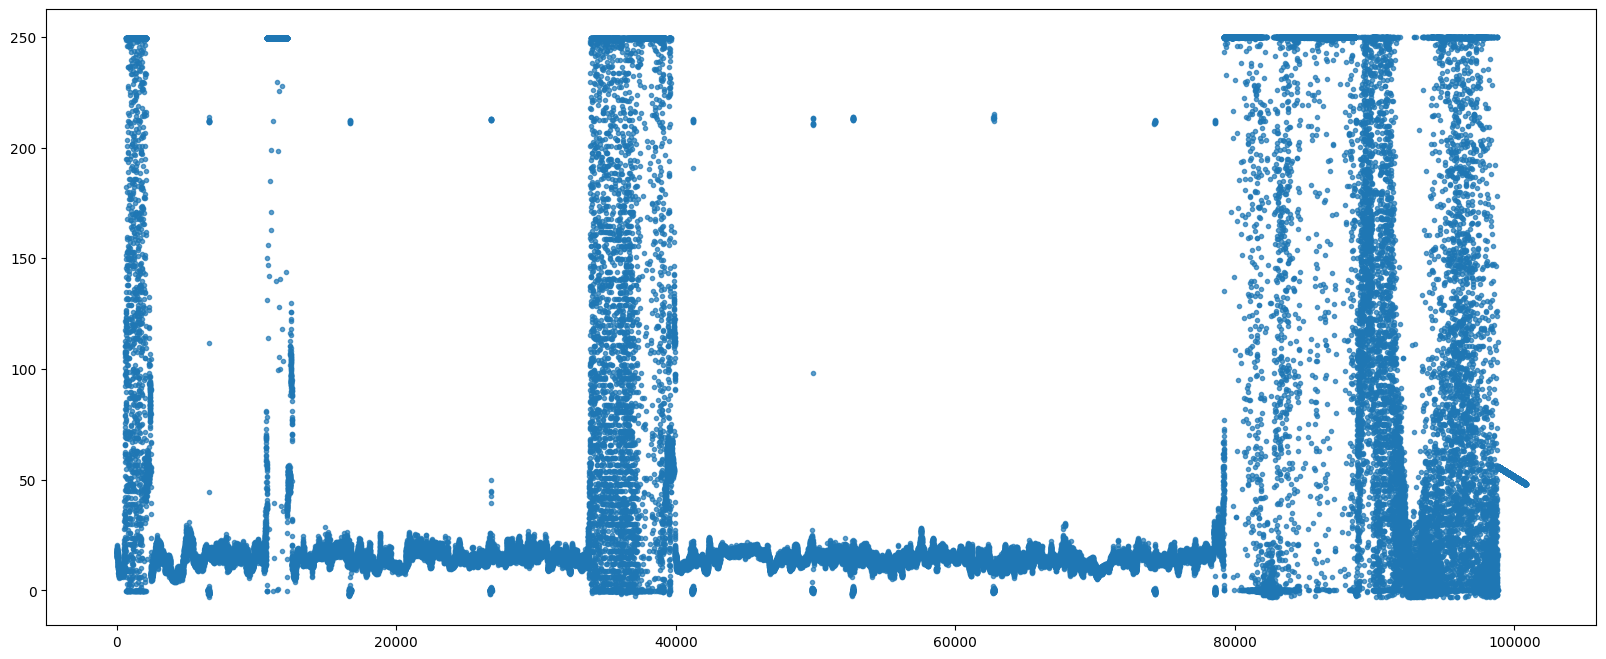

In [73]:
plt.figure(figsize=(20,8))
plt.plot( df3.iloc[:,1], marker='.', linestyle=' ', alpha=0.7)

plt.show()

In [74]:
df3.drop(np.r_[0:2480, 10556:12636, 33555:40036, 78475:100799], axis=0, inplace=True)


In [75]:
df3

,Description,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,...,AMM/AIR Mixer-A Inlet Flow Sel,FWT TEMP,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION
2480,2022-01-02 17:21:00,7.298507,3.526023,4.814068,4.22288,-6.610844,-1.593303,-12.610141,597.957336,0.005817,...,97.139664,147.734161,103.326927,84.524704,330.882172,4.791044,184.687943,31.154491,107.668388,32.72839
2481,2022-01-02 17:22:00,7.317454,3.697514,4.882964,4.094655,-7.236453,-1.962087,-12.673123,597.912109,0.006015,...,97.189583,148.282196,103.607155,85.406693,329.54599,4.86643,187.320694,31.378616,106.23645,32.959721
2482,2022-01-02 17:23:00,8.19602,3.762388,4.712098,4.156788,-7.654256,-1.712566,-12.762771,596.501282,0.005587,...,94.527596,148.896072,103.804382,84.458702,328.00415,4.894835,188.627502,31.403648,105.07515,32.986744
2483,2022-01-02 17:24:00,6.186108,3.800329,4.939721,4.069403,-7.086837,-1.944393,-13.081701,594.909973,0.006054,...,94.652222,149.685776,103.971046,86.044731,329.026611,4.873897,188.928131,31.104284,105.607208,32.670158
2484,2022-01-02 17:25:00,7.158616,3.826208,4.882938,4.012414,-7.596999,-2.004631,-13.265251,595.766907,0.0057,...,97.977684,150.186188,104.208488,86.30896,330.415863,4.855412,189.385696,30.918022,107.866341,32.475784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78470,2022-03-16 11:51:00,18.419493,1.362339,1.209173,3.018301,-10.306822,-1.137084,-17.058517,603.60553,0.007019,...,223.972687,165.34758,118.77858,158.10733,453.707001,7.03668,249.142868,44.087776,104.398155,46.152283
78471,2022-03-16 11:52:00,19.218729,1.440606,1.153707,3.176707,-10.99775,-2.01466,-17.837925,602.928101,0.007019,...,198.30571,165.624893,118.798622,157.554337,453.322052,7.048404,248.72467,44.148773,103.65667,46.214622
78472,2022-03-16 11:53:00,19.073271,1.794209,1.574447,3.209239,-10.617782,-1.974389,-17.437344,600.781067,0.007019,...,182.354584,166.08136,118.996597,152.970673,454.827759,7.03911,248.024734,44.074032,104.710709,46.122807
78473,2022-03-16 11:54:00,19.401367,1.917023,1.682098,3.109566,-10.394741,-1.867612,-17.595339,601.025696,0.007019,...,200.991058,166.385025,119.089935,156.06868,456.635956,7.036053,247.855057,44.03347,104.677505,46.108162


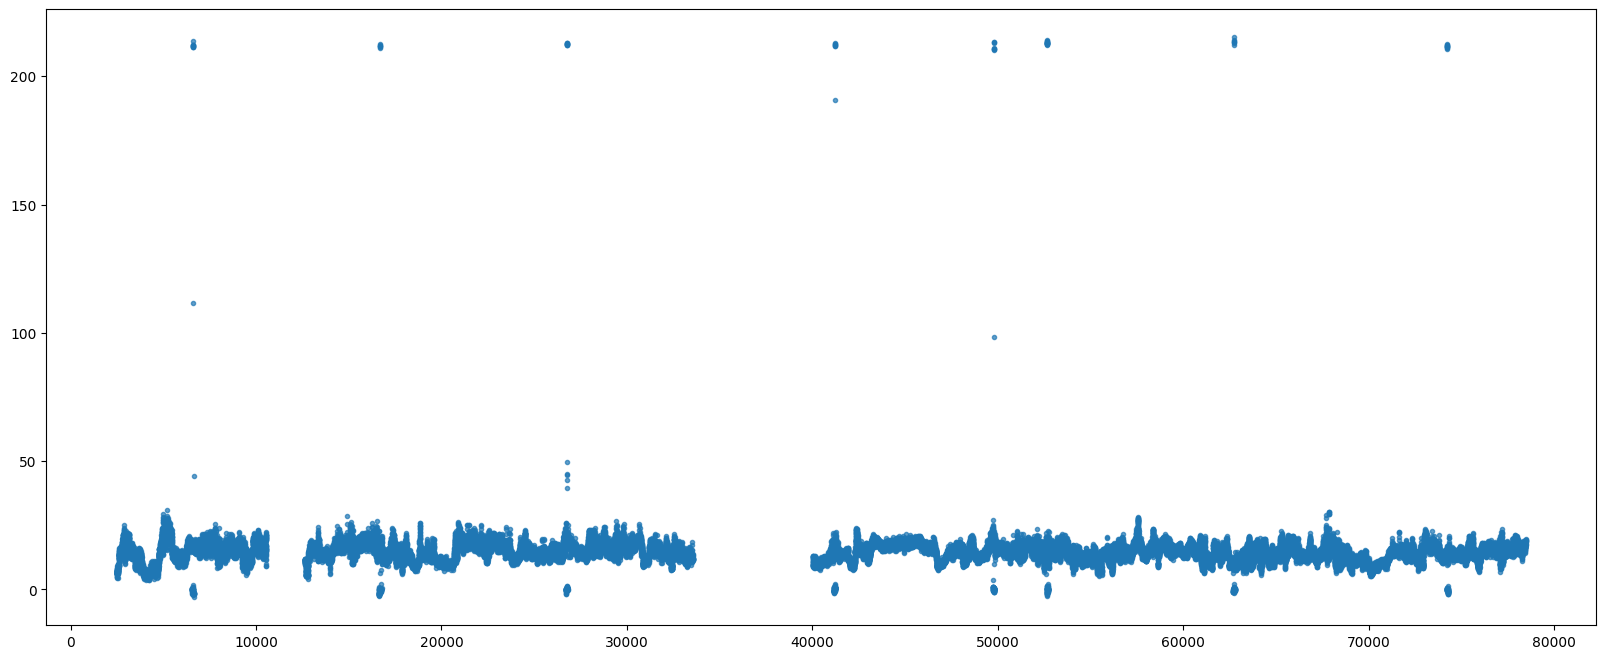

In [76]:
plt.figure(figsize=(20,8))
plt.plot( df3.iloc[:,1], marker='.', linestyle=' ', alpha=0.7)

plt.show()

In [77]:
df3.reset_index(inplace=True, drop=True)


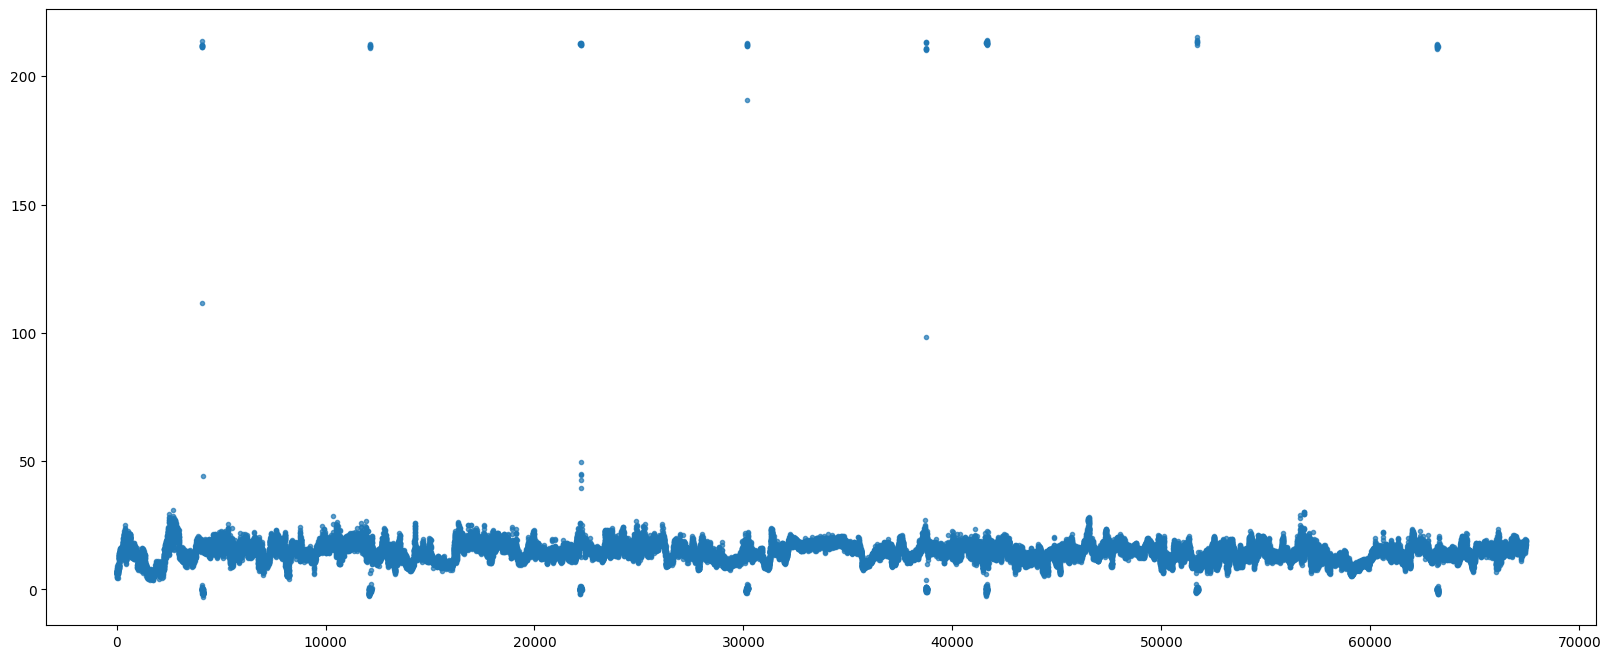

In [78]:
plt.figure(figsize=(20,8))
plt.plot( df3.iloc[:,1], marker='.', linestyle=' ', alpha=0.7)

plt.show()

# z-score

In [79]:
datetime = df3.iloc[:,0]
z = df3.iloc[:,1:].apply(pd.to_numeric, errors='coerce')

In [81]:
z = stats.zscore(z.iloc[:,:])

In [82]:
z

,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,SRH(Reheater) OUT STM TEMP,...,AMM/AIR Mixer-A Inlet Flow Sel,FWT TEMP,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION
0,-0.997139,3.680341,4.062455,4.004199,2.967477,2.804255,1.807486,-1.540271,-2.382717,-0.801833,...,-1.021634,-4.977785,-4.238205,-1.619321,-0.691447,-2.472984,-2.612308,-1.849883,2.053229,-1.847998
1,-0.994633,4.072243,4.165622,3.580615,2.145329,2.072974,1.751463,-1.558986,-1.988941,-1.094115,...,-1.019934,-4.768831,-4.155944,-1.582280,-0.734375,-2.299573,-2.455162,-1.771618,1.854672,-1.770237
2,-0.878419,4.220498,3.909760,3.785867,1.596269,2.567762,1.671722,-2.142776,-2.840175,-1.785397,...,-1.110596,-4.534773,-4.098047,-1.622093,-0.783910,-2.234233,-2.377160,-1.762877,1.693643,-1.761153
3,-1.144283,4.307203,4.250613,3.497196,2.341948,2.108061,1.388034,-2.801247,-1.911858,-2.612728,...,-1.106351,-4.233676,-4.049122,-1.555484,-0.751061,-2.282397,-2.359216,-1.867415,1.767420,-1.867572
4,-1.015643,4.366343,4.165584,3.308936,1.671514,1.988613,1.224767,-2.446654,-2.615525,-2.733479,...,-0.993093,-4.042880,-3.979420,-1.544387,-0.706429,-2.324918,-2.331904,-1.932459,2.080677,-1.932911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67429,0.473903,-1.264250,-1.335688,0.024951,-1.889621,3.708915,-2.149336,0.796909,0.006577,0.446820,...,3.298038,1.737832,0.297674,1.470959,3.254542,2.692652,1.234940,2.666457,1.599770,2.664395
67430,0.579623,-1.085387,-1.418746,0.548236,-2.797610,1.968725,-2.842617,0.516594,0.006577,0.543678,...,2.423873,1.843566,0.303558,1.447734,3.242175,2.719621,1.209978,2.687757,1.496953,2.685350
67431,0.560382,-0.277313,-0.788710,0.655703,-2.298271,2.048581,-2.486301,-0.371833,0.006577,0.149326,...,1.880611,2.017607,0.361674,1.255232,3.290548,2.698241,1.168200,2.661657,1.643109,2.654487
67432,0.603782,0.003351,-0.627508,0.326440,-2.005161,2.260314,-2.626837,-0.270607,0.006577,-0.054268,...,2.515331,2.133388,0.389073,1.385341,3.348640,2.691210,1.158072,2.647493,1.638505,2.649564


In [83]:
df4 = pd.concat([datetime,z],axis=1)

In [84]:
z1 = df4.drop(outliers[0]).reset_index(drop=True)

In [85]:
z1

,Description,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,...,AMM/AIR Mixer-A Inlet Flow Sel,FWT TEMP,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION
0,2022-01-02 18:23:00,-0.696720,1.780565,2.991449,2.256335,1.092835,0.794482,1.119847,-0.239467,-2.623049,...,-1.703267,-2.411596,-0.803235,-1.951646,-1.054610,-2.245224,-2.225343,-2.028138,1.154996,-2.026161
1,2022-01-02 18:26:00,-1.136638,2.060365,2.844743,2.193955,1.241182,0.187569,0.825091,-0.573274,-2.934943,...,-1.588441,-2.403986,-0.732489,-1.983516,-1.094731,-2.148095,-2.214059,-1.994608,1.173750,-1.994063
2,2022-01-02 18:28:00,-1.072279,2.094039,2.970381,1.718137,1.800609,0.376263,1.109972,-0.748070,-2.978062,...,-1.550945,-2.384171,-0.705726,-1.963824,-1.076626,-2.192102,-2.247237,-2.047210,1.242733,-2.044568
3,2022-01-02 18:29:00,-0.964906,1.876524,2.476940,1.246795,0.571312,0.333397,0.804488,-0.280129,-2.135760,...,-1.699520,-2.391775,-0.671157,-1.991270,-1.069302,-2.206725,-2.251125,-2.059985,1.402284,-2.055574
4,2022-01-02 18:30:00,-1.090287,1.899278,2.646269,1.435392,0.505971,-0.433901,0.597248,0.537152,-1.585906,...,-1.678613,-2.383275,-0.655258,-1.883006,-1.073603,-2.220357,-2.234001,-2.057402,1.130145,-2.053294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62775,2022-03-16 11:41:00,0.265857,0.000963,-0.178544,2.395042,-1.810446,0.420922,-1.151115,-1.762902,0.006577,...,1.859310,1.417205,0.204051,0.327606,1.876406,1.118065,1.125768,1.146253,0.446107,1.134180
62776,2022-03-16 11:42:00,0.161821,-0.907756,-0.520904,1.760988,-0.913002,1.519289,-1.338824,-0.996386,0.006577,...,1.929065,1.358038,0.163715,0.638279,2.061500,1.111407,1.109180,1.168355,0.571459,1.168223
62777,2022-03-16 11:43:00,0.237987,-0.725154,-0.598766,0.966108,-1.782670,1.250577,-1.370039,0.475098,0.006577,...,2.108986,1.296508,0.149471,0.913418,2.345914,1.210235,1.155295,1.304677,0.710798,1.309256
62778,2022-03-16 11:44:00,0.395763,-1.366680,-0.785705,0.135387,-1.641799,2.296248,-1.620015,1.654851,0.006577,...,2.053040,1.236892,0.152344,1.078345,2.513985,1.422461,1.216345,1.519712,0.757007,1.517956


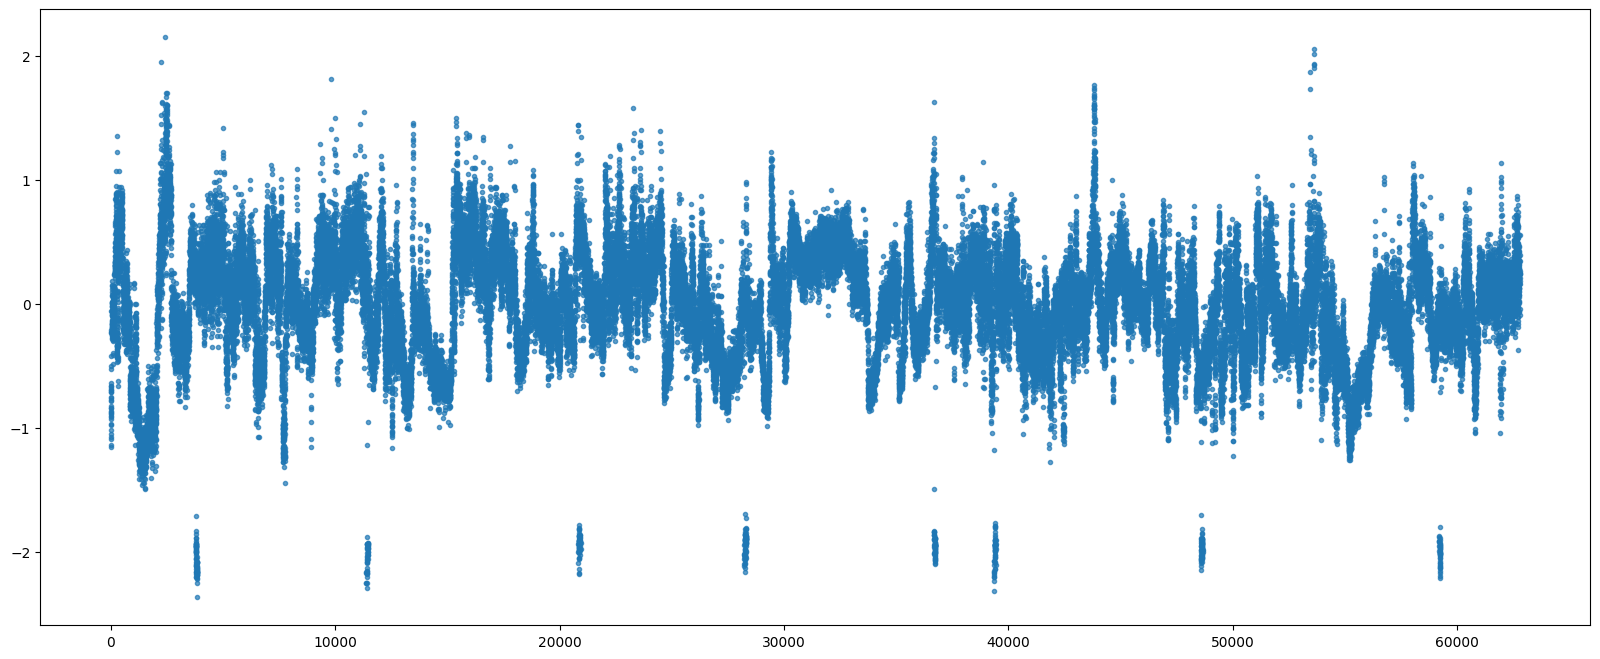

In [86]:
plt.figure(figsize=(20,8))

plt.plot( z1.iloc[:,1], marker='.', linestyle=' ', alpha=0.7)

plt.show()

# 온도 습도 다운

In [ ]:
# 2022년 1월
def download_file(file_url, save_path):
    with open(save_path, 'wb') as f: # 저장할 파일을 바이너리 쓰기 모드로 열기
        response = requests.get(file_url) # 파일 URL에 GET 요청 보내기
        f.write(response.content) # 응답의 내용을 파일에 쓰기

temp=pd.DataFrame()

for i in tqdm(range(1,32)):
    if i < 10:
        url = f'https://apihub.kma.go.kr/api/typ01/cgi-bin/url/nph-aws2_min?tm1=2022010{i}0000&tm2=2022010{i}1159&stn=129&disp=1&help=1&authKey=2izc0OqiSVGs3NDqoqlR-A'
        url1 =f'https://apihub.kma.go.kr/api/typ01/cgi-bin/url/nph-aws2_min?tm1=2022010{i}1200&tm2=2022010{i}2359&stn=129&disp=1&help=1&authKey=2izc0OqiSVGs3NDqoqlR-A'
        
    else:

        url = f'https://apihub.kma.go.kr/api/typ01/cgi-bin/url/nph-aws2_min?tm1=202201{i}0000&tm2=202201{i}1159&stn=129&disp=1&help=1&authKey=2izc0OqiSVGs3NDqoqlR-A'
        url1 =f'https://apihub.kma.go.kr/api/typ01/cgi-bin/url/nph-aws2_min?tm1=202201{i}1200&tm2=202201{i}2359&stn=129&disp=1&help=1&authKey=2izc0OqiSVGs3NDqoqlR-A'

    save_file_path = f'../data./tp/temp_a_{i}.csv'
    save_file_path1 = f'../data./tp/temp_b_{i}.csv'


    # 파일 다운로드 함수를 호출합니다.
    download_file(url, save_file_path)
    download_file(url1, save_file_path1)
    
    # print download state
    print('Download complete\n')
    
    temp_a = pd.read_csv(f'../data./tp/temp_a_{i}.csv', 
                         header=None, 
                         encoding='cp949', skiprows=22)
    
    temp_b = pd.read_csv(f'../data./tp/temp_b_{i}.csv', 
                         header=None, 
                         encoding='cp949', skiprows=22)
    
    # Remove last row (END command)
    temp_a.drop(len(temp_a)-1, inplace=True)
    temp_b.drop(len(temp_b)-1, inplace=True)
    
    if i == 1:
        temp = pd.concat([temp, temp_a])
        temp = pd.concat([temp, temp_b])
    
    else:
        temp = pd.concat([temp, temp_a, temp_b])
  

In [ ]:
# 2022 02

for i in tqdm(range(1,29)):
    if i < 10:
        url = f'https://apihub.kma.go.kr/api/typ01/cgi-bin/url/nph-aws2_min?tm1=2022020{i}0000&tm2=2022020{i}1159&stn=129&disp=1&help=1&authKey=2izc0OqiSVGs3NDqoqlR-A'
        url1 =f'https://apihub.kma.go.kr/api/typ01/cgi-bin/url/nph-aws2_min?tm1=2022020{i}1200&tm2=2022020{i}2359&stn=129&disp=1&help=1&authKey=2izc0OqiSVGs3NDqoqlR-A'
        
    else:

        url = f'https://apihub.kma.go.kr/api/typ01/cgi-bin/url/nph-aws2_min?tm1=202202{i}0000&tm2=202202{i}1159&stn=129&disp=1&help=1&authKey=2izc0OqiSVGs3NDqoqlR-A'
        url1 =f'https://apihub.kma.go.kr/api/typ01/cgi-bin/url/nph-aws2_min?tm1=202202{i}1200&tm2=202202{i}2359&stn=129&disp=1&help=1&authKey=2izc0OqiSVGs3NDqoqlR-A'

    save_file_path = f'../data./tp/temp_a_{i}.csv'
    save_file_path1 = f'../data./tp/temp_b_{i}.csv'


    # 파일 다운로드 함수를 호출합니다.
    download_file(url, save_file_path)
    download_file(url1, save_file_path1)
    
    # print download state
    print('Download complete\n')
    
    temp_a = pd.read_csv(f'../data./tp/temp_a_{i}.csv', 
                         header=None, 
                         encoding='cp949', skiprows=22)
    
    temp_b = pd.read_csv(f'../data./tp/temp_b_{i}.csv', 
                         header=None, 
                         encoding='cp949', skiprows=22)
    
    # Remove last row (END command)
    temp_a.drop(len(temp_a)-1, inplace=True)
    temp_b.drop(len(temp_b)-1, inplace=True)
    
    temp = pd.concat([temp, temp_a, temp_b])
    

  

In [ ]:
#2022 03

for i in tqdm(range(1,32)):
    if i < 10:
        url = f'https://apihub.kma.go.kr/api/typ01/cgi-bin/url/nph-aws2_min?tm1=2022030{i}0000&tm2=2022030{i}1159&stn=129&disp=1&help=1&authKey=2izc0OqiSVGs3NDqoqlR-A'
        url1 =f'https://apihub.kma.go.kr/api/typ01/cgi-bin/url/nph-aws2_min?tm1=2022030{i}1200&tm2=2022030{i}2359&stn=129&disp=1&help=1&authKey=2izc0OqiSVGs3NDqoqlR-A'
        
    else:

        url = f'https://apihub.kma.go.kr/api/typ01/cgi-bin/url/nph-aws2_min?tm1=202203{i}0000&tm2=202203{i}1159&stn=129&disp=1&help=1&authKey=2izc0OqiSVGs3NDqoqlR-A'
        url1 =f'https://apihub.kma.go.kr/api/typ01/cgi-bin/url/nph-aws2_min?tm1=202203{i}1200&tm2=202203{i}2359&stn=129&disp=1&help=1&authKey=2izc0OqiSVGs3NDqoqlR-A'

    save_file_path = f'../data./tp/temp_a_{i}.csv'
    save_file_path1 = f'../data./tp/temp_b_{i}.csv'


    # 파일 다운로드 함수를 호출합니다.
    download_file(url, save_file_path)
    download_file(url1, save_file_path1)
    
    # print download state
    print('Download complete\n')
    
    temp_a = pd.read_csv(f'../data./tp/temp_a_{i}.csv', 
                         header=None, 
                         encoding='cp949', skiprows=22)
    
    temp_b = pd.read_csv(f'../data./tp/temp_b_{i}.csv', 
                         header=None, 
                         encoding='cp949', skiprows=22)
    
    # Remove last row (END command)
    temp_a.drop(len(temp_a)-1, inplace=True)
    temp_b.drop(len(temp_b)-1, inplace=True)
    
    temp = pd.concat([temp, temp_a, temp_b])

In [ ]:
column_name = ['date','id','wd1','ws1','wds','wss','wd10','ws10','ta','re','rn-15m','rn-60m','rn-12h','rn-day','hm','pa','ps','td','etc']
temp.columns=column_name
temp.drop('etc', axis=1, inplace=True)

In [ ]:
temp.date = pd.to_datetime(temp.date)
temp.reset_index(drop=True, inplace=True)
temp

In [ ]:
temp = df.iloc[:,[0,8,14]]

In [ ]:
temp.to_csv('../data/tmep.csv', index=False)


# 시간을 기준으로 z score와 온도 습도 붙이기

In [ ]:
z1.rename(columns={'Description':'Date'},inplace=True)
temp.rename(columns={'date':'Date'},inplace=True)

In [ ]:
data = pd.merge(z1,temp,how="inner",on="Date")

In [ ]:
df.to_csv('../data/comple_pre.csv', index=False)
